In [28]:
import numpy as np, os, lmfit
import mcvine.cli
import dgsres
from dgsres.powder import use_ConstantQEKernel, fit
from dgsres import icg
import matplotlib.pyplot as plt
%matplotlib notebook

# Simulate

In [ ]:
beam = "/SNS/users/lj7/simulations/ARCS/beam/300meV-n3e9"
Q = 11
workdir = 'work'
sim = use_ConstantQEKernel.Sim(
    instrument = 'ARCS',
    workdir = workdir,
    beamdir = beam,
    Ei = 300,
    Q = Q,
    dQ_axis=(-1, 1, 0.05),
    dE_axis=(-60, 60, .5),
    ncount = 1e7,
    nodes = 20,
    )
for E in np.arange(0., 300., 30.):
    sim.run(E=E)

# Fit

In [4]:
params = lmfit.Parameters()
params.add('a', min=0., max=1.)
params.add('b', min=0., max=.3)
params.add('R', value=0.3, vary=False)
params.add('sigma', min=0., max=20.)
params.add('t0', min=0., max=100.)

In [7]:
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [24]:
fit_IE = fit.Fit_IE(simout='work/out', Ei=300., params=params, geom=geom)

In [25]:
res = fit_IE.fit_all()

/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:31: RuntimeWarning: invalid value encountered in sqrt
  t = -l3/vf + l3/np.sqrt(vi**2-SE2V**2*E)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:55: RuntimeWarning: overflow encountered in exp
  T2_b = np.exp(vmin_b**2 - umin**2)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:56: RuntimeWarning: invalid value encountered in multiply
  C0_b = sqp/sq2*T1*T2_b*erfc(vmin_b)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:51: RuntimeWarning: overflow encountered in exp
  T1 = sigma*l/(l2+l3);  T2_a = np.exp(vmin_a**2 - umin**2)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:52: RuntimeWarning: invalid value encountered in multiply
  C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/dgsres/icg.py:53: RuntimeWarning: invalid value encountered in multiply
  C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a

# Plot

<IPython.core.display.Javascript object>


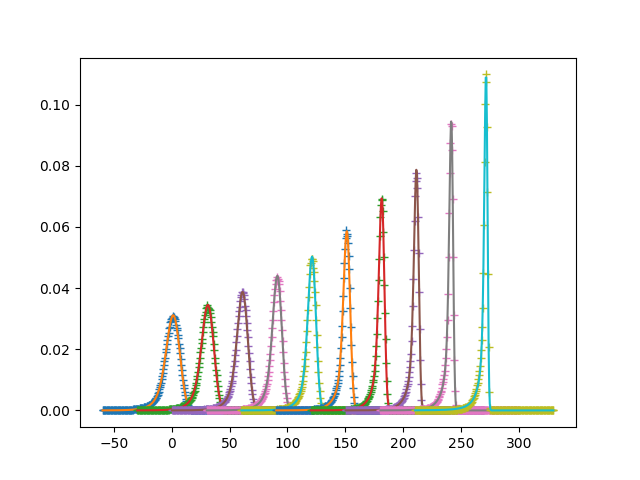

In [35]:
Q = 11.
E_list = np.arange(0., 280., 30.)
plt.figure()
for E in E_list:
    x,y0,y0err = fit_IE.getData(Q, E)
    y = icg.resolution(x, Ei=300., E0=E, geom=fit_IE.geom, **res[(Q,E)].params.valuesdict())
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(x,y0, '+')
    plt.plot(x, y)
plt.show()

# Parameter plots

In [42]:
def get_p_list(name):
    return [res[(Q,E)].params[name].value for E in E_list]

<IPython.core.display.Javascript object>


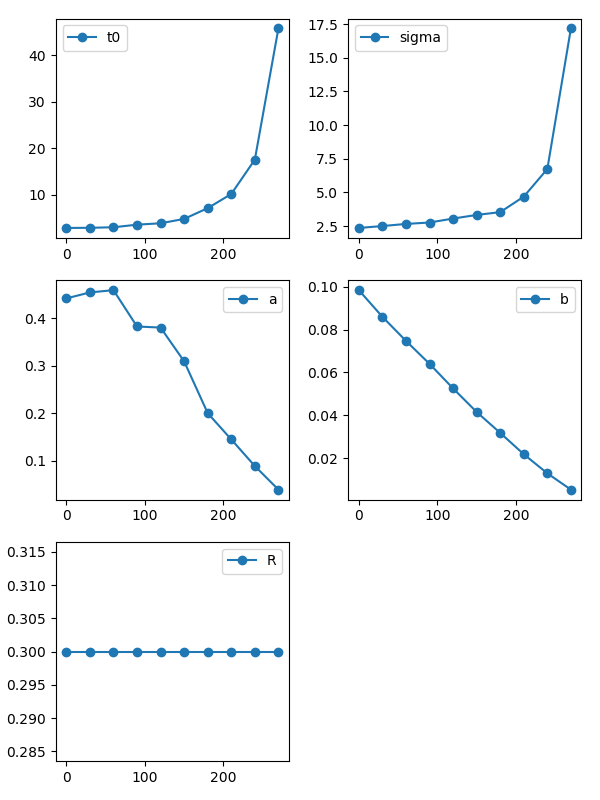

In [44]:
variables = 't0 sigma a b R'.split()
plt.figure(figsize=(6,8))
for i,v in enumerate(variables):
    plt.subplot(3, 2, i+1)
    plt.plot(E_list, get_p_list(v), '-o', label=v)
    plt.legend()
    continue

plt.tight_layout()
plt.show()